In [1]:
from toolbox import ToolBox
from tqdm import tqdm

from models import *

tqdm.pandas()

In [2]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tb = ToolBox()

In [4]:
df = tb.load_data_sql(table='user_reviews_clean', use_cache=True)
df = df[~df['review'].isnull()]
df.head()

Loading from database


,id,date,grade,game,review,sentiment
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612


In [5]:
len(df)

211773

In [7]:
min_dates = pd.DataFrame(df.groupby('game', as_index=False)['date'].min())
min_dates.head()

,game,date
0,007-legends-pc,2012-11-03
1,007-legends-playstation-3,2012-10-16
2,007-legends-wii-u,2013-01-04
3,007-legends-xbox-360,2012-10-16
4,007-quantum-of-solace-pc,2011-06-22


In [8]:
min_dates = min_dates.rename(columns={'date':'release_date'})
min_dates.head()

,game,release_date
0,007-legends-pc,2012-11-03
1,007-legends-playstation-3,2012-10-16
2,007-legends-wii-u,2013-01-04
3,007-legends-xbox-360,2012-10-16
4,007-quantum-of-solace-pc,2011-06-22


In [9]:
df = pd.merge(df, min_dates, on='game')
df.head()

,id,date,grade,game,review,sentiment,release_date
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03


In [10]:
def difference_weeks(date, release_date):
    date_dif=date-release_date
    weeks = math.floor(date_dif/np.timedelta64(1,'W'))
    return weeks

In [12]:
df['week'] = df.progress_apply(lambda row: difference_weeks(row['date'], row['release_date']), axis=1)

100%|███████████████████████████████████████████████████████████████████████| 211773/211773 [00:19<00:00, 10705.10it/s]


In [13]:
df.head()

,id,date,grade,game,review,sentiment,release_date,week
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03,11
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03,85
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03,109
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03,0
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03,0


In [48]:
df_2_months = df[df['week'] < 16]
df_2_months['week'].value_counts()

0     41548
1     10768
2      6470
3      4886
4      3912
5      3334
6      3140
7      2947
8      2584
9      2503
10     2195
12     2037
11     2016
13     1759
14     1671
15     1617
Name: week, dtype: int64

In [49]:
df_dummies = pd.concat([df_2_months, pd.get_dummies(df_2_months['week'])], axis=1)
df_dummies.head()

,id,date,grade,game,review,sentiment,release_date,week,0,1,...,6,7,8,9,10,11,12,13,14,15
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03,11,0,0,...,0,0,0,0,0,1,0,0,0,0
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,128009,2012-11-05,0,007-legends-pc,Worst game on PC I've played ever.... not a si...,-0.5831,2012-11-03,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,128010,2013-02-20,60,007-legends-pc,The game is not really a lot of trouble. I do ...,-0.8467,2012-11-03,15,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
df_review_count = df_dummies.groupby('game').sum()
df_review_count = df_review_count.drop(['id', 'grade', 'sentiment', 'week'], 1)
df_review_count.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
game,,,,,,,,,,,,,,,,
007-legends-pc,6,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
007-legends-playstation-3,1,1,1,2,0,0,0,0,0,0,1,0,0,0,0,0
007-legends-wii-u,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
007-legends-xbox-360,5,3,1,0,1,1,0,0,0,1,0,2,0,0,0,0
007-quantum-of-solace-pc,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [324]:
week_sizes = np.arange(1,9)
min_games = np.arange(1,20,1)

combinations = np.array(np.meshgrid(*[week_sizes, min_games])).T.reshape(-1,2)
combinations[:5]

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5]])

### Regression

In [134]:
!pip install statsmodels patsy -q

In [135]:
from statsmodels.formula.api import ols

In [139]:
df_review_count.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
game,,,,,,,,,,,,,,,,
007-legends-pc,6,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
007-legends-playstation-3,1,1,1,2,0,0,0,0,0,0,1,0,0,0,0,0
007-legends-wii-u,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
007-legends-xbox-360,5,3,1,0,1,1,0,0,0,1,0,2,0,0,0,0
007-quantum-of-solace-pc,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [144]:
df_all = df.join(df_review_count, on='game')
df_all.head()

,id,date,grade,game,review,sentiment,release_date,week,0,1,...,6,7,8,9,10,11,12,13,14,15
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03,11,6,1,...,1,0,0,0,0,1,0,0,0,1
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03,85,6,1,...,1,0,0,0,0,1,0,0,0,1
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03,109,6,1,...,1,0,0,0,0,1,0,0,0,1
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03,0,6,1,...,1,0,0,0,0,1,0,0,0,1
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03,0,6,1,...,1,0,0,0,0,1,0,0,0,1


#### Critic values

In [182]:
critics = pd.read_pickle('critic_review_clean.pkl')

In [183]:
def critic_preprocessing(df):
    # create aggregated variables for each game
    reviews_grouped = df.groupby(['game'], as_index=False).agg({'grade': 'mean', 'sentiment': 'std', 
                                                                        'review': 'count'})
    
    reviews_grouped.rename({'grade': 'critic_avg_grade', 'sentiment': 'critic_sentiment_var',
                       'review': 'critic_volume'}, inplace=True, axis=1)
    
    return reviews_grouped

In [185]:
df_critic = critic_preprocessing(critics).set_index('game')
df_critic.head()

,critic_avg_grade,critic_sentiment_var,critic_volume
game,,,
007-legends-pc,26.800000,0.351563,5
007-legends-playstation-3,42.318182,0.619410,22
007-legends-wii-u,40.666667,0.080168,3
007-legends-xbox-360,46.448980,0.669014,49
007-quantum-of-solace-ds,64.300000,0.411520,10


In [329]:
reg_results = []
reg_summaries = []

for combination in tqdm(combinations):
    week_size = combination[0]
    min_game = combination[1]

    # Get the column numbers of the dependant and independant variables
    independant_weeks = list(range(week_size))
    dependant_weeks = list(range(week_size, 2*week_size))

    # Get the games that satisfy the minimum game condition
    independant_games = (df_all[independant_weeks].sum(axis=1) >= min_game).values
    dependant_games = (df_all[dependant_weeks].sum(axis=1) >= min_game).values

    # All games that satisfy the minimum games condition
    satisied_games = df_all[independant_games & dependant_games]

    satisied_games_independant = satisied_games[satisied_games['week'].isin(independant_weeks)]
    satisied_games_dependant = satisied_games[satisied_games['week'].isin(dependant_weeks)]

    # The number of reviews per game (dependant variable)
    games_dependant = (satisied_games_dependant
                       .groupby('game')
                       .agg({'review': 'count'})
                       .rename({'review': 'n_reviews'}, axis=1))

    games_independant = (satisied_games_independant
                         .groupby('game')
                         .agg({'sentiment': 'std', 'grade': 'mean'})
                         .rename({'sentiment': 'user_sentiment_var', 'grade': 'user_avg_grade'}, axis=1))

    # Join all the data into one dataframe
    df_regression = games_independant.join(games_dependant, 'game').join(df_critic, 'game')
    n_games = len(df_regression)

    # Run the regression
    model = ols('n_reviews ~ 1 + user_sentiment_var*critic_sentiment_var + user_avg_grade + critic_avg_grade +  critic_volume', data=df_regression)
    regression = model.fit()

    # Get the p value of user sentiment variance
    p_value_user_var = regression.pvalues['user_sentiment_var']
    r_squared = regression.rsquared
    
    # Store the results
    reg_results.append([week_size, min_game, n_games, p_value_user_var, r_squared])
    reg_summaries.append([week_size, min_game, regression.summary])
    
reg_results = np.array(reg_results)
reg_summaries = np.array(reg_summaries)

100%|████████████████████████████████████████████████████████████████████████████████| 152/152 [00:13<00:00,  9.98it/s]


In [318]:
def find_summary(_period_size, _min_games):
    return reg_summaries[(reg_summaries[:,0] == _period_size) & (reg_summaries[:,1] == _min_games)][0][2]()

In [334]:
find_summary(period_size=3, min_games=14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_reviews   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.327
Date:                Sat, 09 Nov 2019   Prob (F-statistic):             0.0426
Time:                        16:06:28   Log-Likelihood:                -272.16
No. Observations:                  72   AIC:                             558.3
Df Residuals:                      65   BIC:                             574.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -8.1501     25.906     -0.315      0.754     -59.887      43.587
user_sentiment_var                         30.5949     37.232      0.822      0.414     -43.762     104.952
critic_sentiment_var                       75.0651     53.431      1.405      0.165     -31.645     181.775
user_sentiment_var:critic_sentiment_var   -85.6540     79.324     -1.080      0.284    -244.074      72.766
user_avg_grade                             -0.0278      0.082     -0.339      0.736      -0.192       0.136
critic_avg_grade                           -0.1048      0.128     -0.821      0.415      -0.360       0.150
critic_volume                               0.1733      0.051      3.406      0.001       0.072       0.275
==============================================================================
Omnibus:                      103.590   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2474.442
Skew:                           4.388   Prob(JB):                         0.00
Kurtosis:                      30.346   Cond. No.                     8.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [320]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [326]:
# Transform the p values into a grid
p_value_grid = reg_results[:,3].reshape(len(week_sizes), len(min_games))

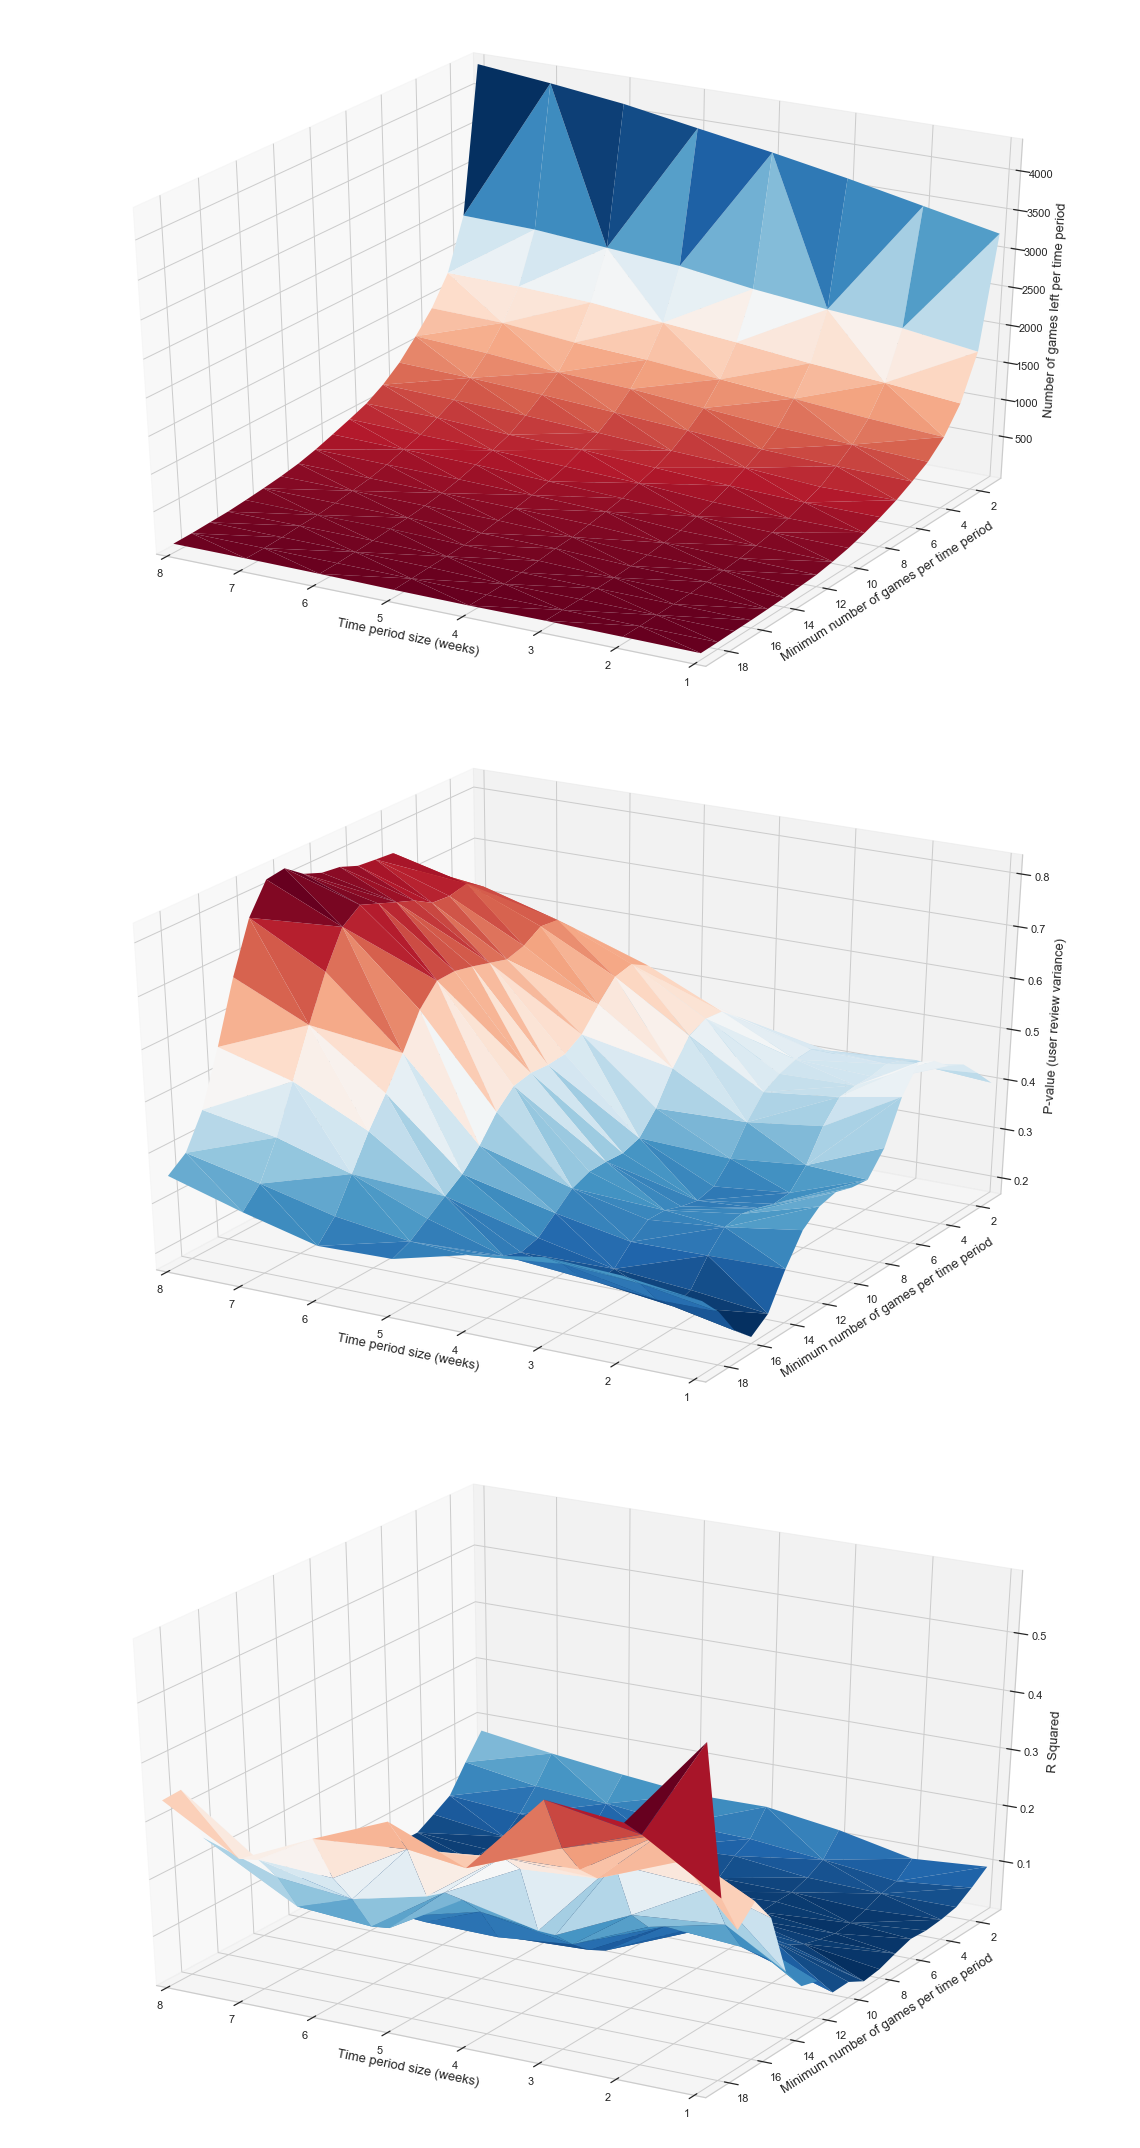

In [352]:
sns.set(style='whitegrid')

fig = plt.figure(figsize=(16, 30))
ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')

# number of games plot
ax1.plot_trisurf(reg_results[:,0], reg_results[:,1], reg_results[:,2], cmap='RdBu', linewidth=0)

ax1.set_xlabel('Time period size (weeks)', fontsize=13)
ax1.set_ylabel('Minimum number of games per time period', fontsize=13)
ax1.set_zlabel('Number of games left per time period', fontsize=13)

ax1.set_xlim(np.max(reg_results[:,0]), np.min(reg_results[:,0]))
ax1.set_ylim(np.max(reg_results[:,1]), np.min(reg_results[:,1]));

# p value plot
ax2.plot_trisurf(reg_results[:,0], reg_results[:,1], gaussian_filter(p_value_grid, sigma=1.2).flatten(), cmap='RdBu_r', 
                 linewidth=0)

ax2.set_xlabel('Time period size (weeks)', fontsize=13)
ax2.set_ylabel('Minimum number of games per time period', fontsize=13)
ax2.set_zlabel('P-value (user review variance)', fontsize=13)

ax2.set_xlim(np.max(reg_results[:,0]), np.min(reg_results[:,0]))
ax2.set_ylim(np.max(reg_results[:,1]), np.min(reg_results[:,1]))

# p value plot moderator
ax3.plot_trisurf(reg_results[:,0], reg_results[:,1], reg_results[:,4], cmap='RdBu_r', linewidth=0)

ax3.set_xlabel('Time period size (weeks)', fontsize=13)
ax3.set_ylabel('Minimum number of games per time period', fontsize=13)
ax3.set_zlabel('R Squared', fontsize=13)

ax3.set_xlim(np.max(reg_results[:,0]), np.min(reg_results[:,0]))
ax3.set_ylim(np.max(reg_results[:,1]), np.min(reg_results[:,1]))

plt.tight_layout()